# Telecome customer churn Analysis & Prediction

### Introduction: 
Churn rate is the percentage of subscribers to a service that discontinue their subscription to that service in a given time period.

Customers are moving to other competitor companies due to below reasons.
- Poor service.
- Availability of features and content.
- Lower cost substitutes from competitors/ better offer from competitor.
- Negative customer service experiences
- Some unkown reasons

### Problem statement
- Reduce customer churn rate
- Analysis high risk customer group(customer group whose churn rate is more comapred to other clusters/customers)
- Predict whether the given customer will churn or not

### Stakeholders: 
- **Telecom company HR team / Higher management / Telecom company business team**
- Customer (To opt for new services)

As here we don't have any information about other telecom companies/ competitors, we will not be able to perform EDA for customer as stakeholder

### Pain point:
- Reduction in company revenue

### Business Metric:
- Reduce churn rate by 5% of current churn rate
- Aquire new customers

### Data science metric: Recall

FP : Predicted Customer will leave, but actually he did not

FN : Predicted Customer will not leave, but actully he left...



### Exploratory Data Analysis(EDA)
1. Does age impact churn rate
2. Which service facilities are mostly opted out by customers
3. Does mode of payment has any impact on churn rate
4. Does total services provided vs total charges as any positive impact on churn rate(like more services,less charges/discount)
5. Does gender factor make any difference in churn rate
6. Having dependent impacts churn rate?
7. Contract tenure has any impact on churn rate
8. What are the most profitable service types


### Algorithms used:
1. Logistic regression
2. Random forest
3.AdaBoost
4.XGBoost

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# load data set
from google.colab import  files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
# load the data into data frame
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [ ]:
# show  all of the columns

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# show some statictics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# cheking for missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# get the churn count 
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


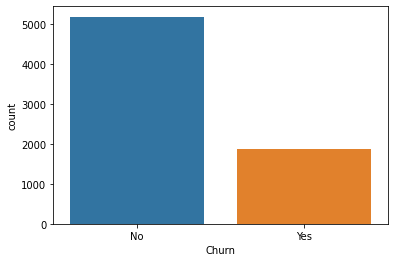

In [ ]:
# visualize the count of coustmer churn
sns.countplot(df['Churn'])

 **Insights**:

Target variable churn rate is baised. so in ordere to balance data we need to use undersampling  and oversampling technique

**Recommendation**

Even though the Churn Rate is not high, but we need to take necessary action in order to reduce it.

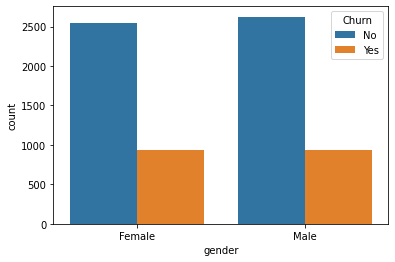

In [ ]:
# visualize the churn count  for both male and females
sns.countplot(x='gender',hue='Churn',data=df)

**Insights**: Gender doesn't really have any impact on churn rate.

**Recommendation**:We need to focus on both the Genders. No specific Gender should be prioritised.

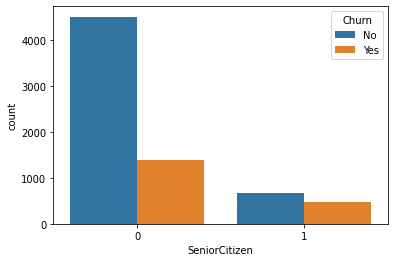

In [ ]:
# visualize the churn count for SeniorCitizen
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

**Insight**: Churn Rate for Senior Citizen is less than Non Senior Citizen.

**Recommendation**: Less focus should be given to Senior Citizen.

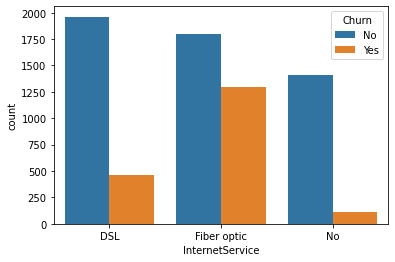

In [ ]:
# visualize the churn count of internet services

sns.countplot(x='InternetService',hue='Churn',data=df)

**Insight** : Customer having Fiber optic Internet Service tends to have higher Churn rate compared to DSL Internet Service.

**Recommendation**: Company needs to check with the service provided by Fiber Optic Internet Service and take necessary action in case of any service issues.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd49a72f080>,
      dtype=object)

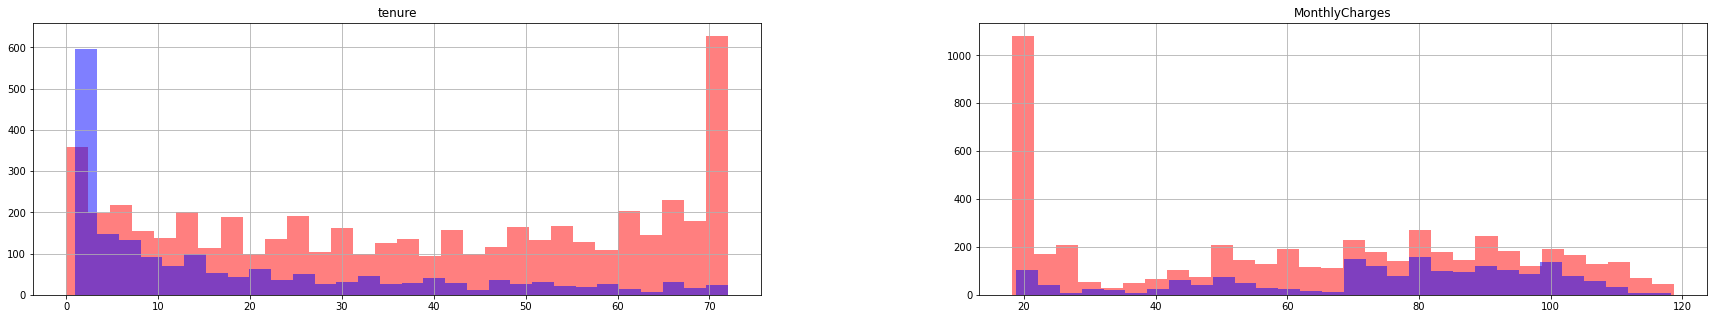

In [ ]:
numeric_featured = ['tenure','MonthlyCharges']
fig , ax=plt.subplots (1,2 , figsize=(30,5))
df[df.Churn == 'No'][numeric_featured].hist(bins=30 , color='red',alpha=0.5 ,ax=ax)
df[df.Churn == 'Yes'][numeric_featured].hist(bins=30 , color='blue',alpha=0.5 ,ax=ax)

**Insight**

**Tennure**: If the Tenure is low, then there are high chances of Customer leaving and if the Tenure is high, then there are high chances of Customer staying.

**Monthly Charges** : When the Monthly charges are more than 70, then the Customer Churn Rate is high.

**Recommandation**

**Tennure** :Try to provide Customer Packages with long Tenure.

**Monthly Charges** : If we keep Monthly charges less than 70, then there are high chances of Customer staying.
Keep Monthly charges less than 70 in order to acquire new Customers.


In [ ]:
df['PaymentMethod'].value_counts()


2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


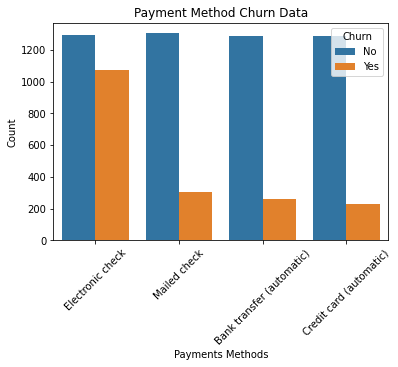

In [ ]:
sns.countplot(df['PaymentMethod'],hue=df['Churn'])
plt.xlabel('Payments Methods')
plt.ylabel('Count')
plt.title('Payment Method Churn Data')
plt.xticks(rotation=45 )
plt.show()

**Insight**: 

The most used Payment Method is Electronic check and it has High Churn Rate. 

**Recommendation** : 

Try to make sure the Other Payment Methods are also used more often as it has less Churn Rate compared to Electronic Check.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


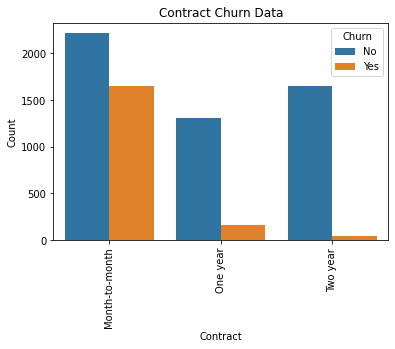

In [ ]:
sns.countplot(df['Contract'],hue=df['Churn'])
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Contract Churn Data')
plt.xticks(rotation=90)
plt.show()
#0- month to month
#1-one year
#2- two year

**Insight** : Month-to-month contract has high Churn Rate.

**Recommendation**: Provide Customer with packages having one year or two year COntract.

In [ ]:
# drop column which is not requried
df =df.drop('customerID',axis=1)

In [ ]:
df.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


## FEATURE ENGINEERING

In [ ]:
# covert all catogorical data into numeric data
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
df.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0


In [ ]:
corr= df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


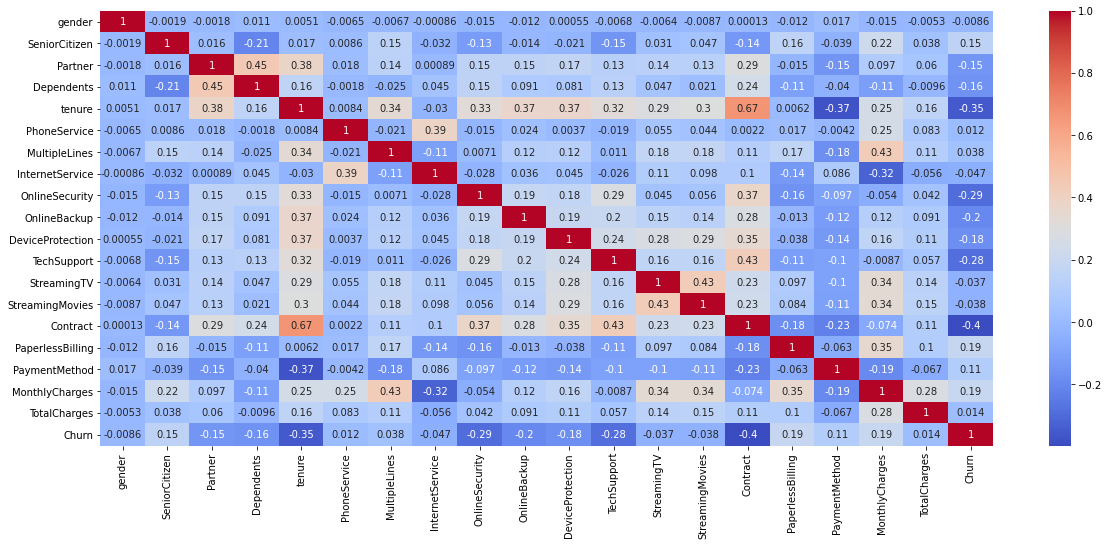

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,cmap="coolwarm",annot=True)

In [ ]:
# scaled the data
from sklearn.preprocessing import StandardScaler

x = df.drop('Churn',axis=1) # feature data set
print(x)
y=df['Churn']

x=  StandardScaler().fit_transform(x)

      gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges
0          0              0  ...           29.85          2505
1          1              0  ...           56.95          1466
2          1              0  ...           53.85           157
3          1              0  ...           42.30          1400
4          0              0  ...           70.70           925
...      ...            ...  ...             ...           ...
7038       1              0  ...           84.80          1597
7039       0              0  ...          103.20          5698
7040       0              0  ...           29.60          2994
7041       1              1  ...           74.40          2660
7042       1              0  ...          105.65          5407

[7043 rows x 19 columns]


In [ ]:
# split the data into (80%)train and (20%)test
from sklearn.model_selection import train_test_split

x_train ,x_test ,y_train, y_test = train_test_split(x , y ,test_size =0.2, random_state=42)
print(y_train)

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64


In [ ]:
# Spot Check Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.798545 (0.007148)
XGB: 0.797479 (0.006919)
ADA: 0.790912 (0.010422)
RF: 0.787542 (0.007127)


In [ ]:
#Applying SMOTE(OverSampling Technique) on RF
smt = SMOTE()
X_train, y_train = smt.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#both having equal amount of records
np.bincount(y_train)

array([4138, 4138])

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.765346 (0.005570)
XGB: 0.839295 (0.009595)
ADA: 0.819117 (0.008904)
RF: 0.855848 (0.003523)


In [ ]:
x = df.drop('Churn',axis=1) # feature data set
print(x)
y=df['Churn']

x=  StandardScaler().fit_transform(x)

      gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges
0          0              0  ...           29.85          2505
1          1              0  ...           56.95          1466
2          1              0  ...           53.85           157
3          1              0  ...           42.30          1400
4          0              0  ...           70.70           925
...      ...            ...  ...             ...           ...
7038       1              0  ...           84.80          1597
7039       0              0  ...          103.20          5698
7040       0              0  ...           29.60          2994
7041       1              1  ...           74.40          2660
7042       1              0  ...          105.65          5407

[7043 rows x 19 columns]


In [ ]:
x_train1 ,x_test1 ,y_train1, y_test1 = train_test_split(x , y ,test_size =0.2, random_state=42)
print(y_train)

[0 0 1 ... 1 1 1]


In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train1, y_train1, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.798545 (0.007148)
XGB: 0.797479 (0.006919)
ADA: 0.790912 (0.010422)
RF: 0.788783 (0.006157)


In [ ]:
#Applying NearMiss(UnderSampling Technique)
nr = NearMiss()
X_train1, y_train1 = nr.fit_sample(x_train1, y_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#both having equal amount of records
np.bincount(y_train1)

array([1496, 1496])

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train1, y_train1, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.688503 (0.029406)
XGB: 0.704875 (0.031510)
ADA: 0.696519 (0.022236)
RF: 0.686830 (0.022365)


In [ ]:
# #create model 
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# model= LogisticRegression()
# #train the model
# model.fit(x_train , y_train)

In [ ]:
# # create predication on test data
# from sklearn.metrics import accuracy_score , recall_score


# pred = model.predict(x_test)

# print(pred)
# y_pred = model.predict(x_test)
# accuracy = accuracy_score(y_pred, y_test)
# # check classification report
# print(classification_report(y_test,pred))

In [ ]:
# #confusion matrix
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred)

In [ ]:
# recall = recall_score(y_test, y_pred)
# print('recall score is : ',recall)

In [ ]:
# y_train.value_counts()

In [ ]:
# model_rf = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,
#                                   random_state =42, max_features = "auto",
#                                   max_leaf_nodes = 20) #n_jobs=-1 then all cores available on the machine are used. 
# model_rf.fit(X_train, y_train)

# # Make predictions
# prediction_y = model_rf.predict(X_test)
# accuracy_rf = accuracy_score(prediction_y, y_test)
# print(accuracy_rf)

0.8041163946061036


In [ ]:
# #Applying SMOTE(OverSampling Technique)
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# #both having equal amount of records
# np.bincount(y_train)

array([4138, 4138])

In [ ]:
# #Applying Logistic Regression again
# model= LogisticRegression(random_state=9)
# #train the model
# model.fit(X_train , y_train)
# y_pred1 = model.predict(x_test)
# accuracy1 = accuracy_score(y_pred1, y_test)
# print('SMOTE Accuracy is : ',accuracy1)

SMOTE Accuracy is :  0.7544357700496807


In [ ]:
# confusion_matrix(y_test, y_pred1)

array([[759, 277],
       [ 69, 304]])

In [ ]:
# recall1 = recall_score(y_test, y_pred1)
# print('SMOTE recall score is : ',recall1)

SMOTE recall score is :  0.8150134048257373


In [ ]:
# #Applying NearMiss(UnderSampling Technique)
# nr = NearMiss()
# X_train, y_train = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# #both having equal amount of records
# np.bincount(y_train)

array([4138, 4138])

In [ ]:
# #Applying Logistic Regression again
# model= LogisticRegression(random_state=9)
# #train the model
# model.fit(X_train , y_train)
# y_pred2 = model.predict(x_test)
# accuracy2 = accuracy_score(y_pred1, y_test)
# print('NearMiss Accuracy is : ',accuracy1)

NearMiss Accuracy is :  0.7544357700496807


In [ ]:
# confusion_matrix(y_test, y_pred2)

array([[759, 277],
       [ 69, 304]])

In [ ]:
# recall2 = recall_score(y_test, y_pred2)
# print('NearMiss recall score is : ',recall2)

NearMiss recall score is :  0.8150134048257373


#Random Forest 

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# model_rf = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,
#                                   random_state =42, max_features = "auto",
#                                   max_leaf_nodes = 20) #n_jobs=-1 then all cores available on the machine are used. 
# model_rf.fit(X_train, y_train)

# # Make predictions
# prediction_y = model_rf.predict(X_test)
# accuracy_rf = accuracy_score(prediction_y, y_test)
# print(accuracy_rf)

0.8019872249822569


In [ ]:
# #confusion matrix
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, prediction_y)

array([[963,  73],
       [206, 167]])

In [ ]:
# recall1 = recall_score(y_test, prediction_y)
# print('recall score is : ',recall1)

recall score is :  0.4477211796246649


In [ ]:
# y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [ ]:
# #Applying SMOTE(OverSampling Technique) on RF
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# #both having equal amount of records
# np.bincount(y_train)

array([4138, 4138])

In [ ]:
# # apply RF after SMOTE (OverSampling Technique) 
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# model_rf = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,
#                                   random_state =42, max_features = "auto",
#                                   max_leaf_nodes = 20) #n_jobs=-1 then all cores available on the machine are used. 
# model_rf.fit(X_train, y_train)

# # Make predictions
# prediction2_y = model_rf.predict(X_test)
# accuracy_rf2 = accuracy_score(prediction2_y, y_test)
# print(accuracy_rf2)


0.8019872249822569


In [ ]:
# confusion_matrix(y_test, prediction2_y)

array([[963,  73],
       [206, 167]])

In [ ]:
# recall = recall_score(y_test, prediction2_y)
# print('SMOTE recall score is : ',recall)

SMOTE recall score is :  0.4477211796246649


In [ ]:
# #Applying NearMiss(UnderSampling Technique)
# nr = NearMiss()
# X_train, y_train = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# np.bincount(y_train)
# #both having equal amount of records

array([1496, 1496])

In [ ]:
# # apply RF after NearMiss (UnderSampling Technique) 
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
#                                   random_state =42, max_features = "auto",
#                                   max_leaf_nodes = 30) #n_jobs=-1 then all cores available on the machine are used. 
# model_rf.fit(X_train, y_train)

# # Make predictions
# prediction3_y = model_rf.predict(X_test)
# accuracy_rf3 = accuracy_score(prediction3_y, y_test)
# print(accuracy_rf3)


0.8062455642299503


In [ ]:
# confusion_matrix(y_test, prediction3_y)

array([[958,  78],
       [195, 178]])

In [ ]:
# recall = recall_score(y_test, prediction3_y)
# print('SMOTE recall score is : ',recall)

SMOTE recall score is :  0.4772117962466488


# Adaboost  

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# model = AdaBoostClassifier(n_estimators=1000, random_state=42)
# model.fit(X_train,y_train)
# pred_ada = model.predict(x_test)
# accuracy_ada = accuracy_score(y_test , pred_ada)
# print(accuracy_ada)

0.8034066713981547


In [ ]:
# confusion_matrix(y_test, pred_ada)

array([[931, 105],
       [172, 201]])

In [ ]:
# recall = recall_score(y_test, pred_ada)
# print('recall score is : ',recall)

recall score is :  0.5388739946380697


In [ ]:
# #both having equal amount of records
# np.bincount(y_train)

array([4138, 1496])

In [ ]:
# # RF after SMOTE

# model = AdaBoostClassifier(n_estimators=1000, random_state=42)
# model.fit(X_train,y_train)
# pred_ada1 = model.predict(x_test)
# accuracy_ada1 = accuracy_score(y_test , pred_ada1)
# print(accuracy_ada1)

0.8034066713981547


In [ ]:
confusion_matrix(y_test, pred_ada1)

array([[931, 105],
       [172, 201]])

In [ ]:
# recall = recall_score(y_test, pred_ada1)
# print('recall score is : ',recall)

recall score is :  0.5388739946380697


In [ ]:
# #Applying NearMiss(UnderSampling Technique)
# nr = NearMiss()
# X_train, y_train = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# np.bincount(y_train)

array([1496, 1496])

In [ ]:
# # Ada after Nearmiss

# model = AdaBoostClassifier(n_estimators=1000, random_state=42)
# model.fit(X_train,y_train)
# pred_ada2 = model.predict(x_test)
# accuracy_ada2 = accuracy_score(y_test , pred_ada2)
# print(accuracy_ada2)

0.6124911284599006


In [ ]:
# confusion_matrix(y_test, pred_ada2)

array([[578, 458],
       [ 88, 285]])

In [ ]:
# recall_ada = recall_score(y_test , pred_ada2)
# print('recall score is : ',recall_ada)

recall score is :  0.7640750670241286


# XGBoost


In [ ]:
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_train, y_train)
# pred_xg = model.predict(X_test)
# accuracy_xg=accuracy_score(y_test, pred_xg)
# print(accuracy_xg)

0.5833924769339958


In [ ]:
# confusion_matrix(y_test , pred_xg)

array([[516, 520],
       [ 67, 306]])

In [ ]:
# recall_xgb = recall_score(y_test , pred_xg)
# print('recall score is : ',recall_xgb)

recall score is :  0.8203753351206434


In [ ]:
# #Applying SMOTE(OverSampling Technique) on XGboost
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(X_train, y_train)

In [ ]:
# #both having equal amount of records
# np.bincount(y_train)

array([1496, 1496])

In [ ]:
# # XGboost after SMOTE

# model = XGBClassifier()
# model.fit(X_train, y_train)
# pred_xgb = model.predict(X_test)
# accuracy_xgb=accuracy_score(y_test, pred_xgb)
# print(accuracy_xgb)

0.5833924769339958


In [ ]:
# confusion_matrix(y_test ,pred_xgb)

array([[516, 520],
       [ 67, 306]])

In [ ]:
# recall_xgb2 = recall_score(y_test ,pred_xgb)
# print(recall_xgb2)

0.8203753351206434


In [ ]:
# #Applying NearMiss(UnderSampling Technique)
# nr = NearMiss()
# X_train, y_train = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# np.bincount(y_train)

array([1496, 1496])

In [ ]:
# # XGboost after nearmiss

# model = XGBClassifier()
# model.fit(X_train, y_train)
# pred_xgb1 = model.predict(X_test)
# accuracy_xgb1=accuracy_score(y_test, pred_xgb1)
# print(accuracy_xgb1)

0.5833924769339958


In [ ]:
# confusion_matrix(y_test, pred_xgb1)

array([[516, 520],
       [ 67, 306]])

In [ ]:
# recall_xgb1 = recall_score(y_test ,pred_xgb1)
# print("recall socre after Nearmiss",recall_xgb1)

recall socre after Nearmiss 0.8203753351206434


In [ ]:
# # Spot Check Algorithms
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('XGB', XGBClassifier()))
# models.append(('ADA', AdaBoostClassifier(n_estimators=1000, random_state=42)))
# models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
# 	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# 	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
# 	results.append(cv_results)
# 	names.append(name)
# 	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.690845 (0.020473)
XGB: 0.710247 (0.021730)
ADA: 0.685509 (0.015955)
RF: 0.693864 (0.019980)


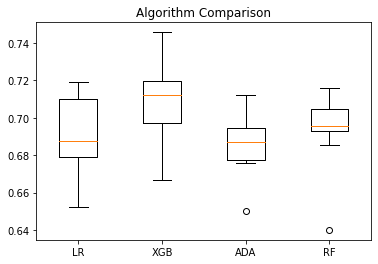

In [ ]:
# import matplotlib.pyplot as pyplot

# pyplot.boxplot(results, labels=names)
# pyplot.title('Algorithm Comparison')
# pyplot.show()
